In [1]:
# import the required components
import pandas as pd
import numpy as np

# import sys
# sys.path.insert(0,'../')

import inputs_AHPLib as cdf_inp
import structs_AHPLib as cdf_str
import calcs_AHPLib as cdf_calc
#set here the number of decimals that you want to be displayed
%precision 4

'%.4f'

In [2]:
kitmodel=cdf_str.Model()

In [3]:
n0=cdf_str.Node("Goal",1)
d1=cdf_str.Node("Risk",2)
d2=cdf_str.Node("Timeline",3)
d3=cdf_str.Node("Flexibility",4)
d4=cdf_str.Node("Demand",5)
d5=cdf_str.Node("Impact",6)
a1=cdf_str.Node("In-House",7)
a2=cdf_str.Node("Existing Vendor",8)
a3=cdf_str.Node("New Vendor",9)

c1=cdf_str.Cluster("1Goal",1)
c2=cdf_str.Cluster("2Criteria",2)
c3=cdf_str.Cluster("3Alternatives",3)

In [4]:
c1.addNode2Cluster(n0)

c2.addNode2Cluster(d1)
c2.addNode2Cluster(d2)
c2.addNode2Cluster(d3)
c2.addNode2Cluster(d4)
c2.addNode2Cluster(d5)

c3.addNode2Cluster(a1)
c3.addNode2Cluster(a2)
c3.addNode2Cluster(a3)

In [5]:
c1.printWithNodes()
c2.printWithNodes()
c3.printWithNodes()

Cluster: 1Goal with nodes: [Goal NID: 0 order: 1]

Cluster: 2Criteria with nodes: [Risk NID: 1 order: 2, Timeline NID: 2 order: 3, Flexibility NID: 3 order: 4, Demand NID: 4 order: 5, Impact NID: 5 order: 6]

Cluster: 3Alternatives with nodes: [In-House NID: 6 order: 7, Existing Vendor NID: 7 order: 8, New Vendor NID: 8 order: 9]



In [6]:
kitmodel.addCluster2Model(c1)
kitmodel.addCluster2Model(c2)
kitmodel.addCluster2Model(c3)

In [7]:
print(kitmodel)

Nodes: [Goal NID: 0 order: 1, Risk NID: 1 order: 2, Timeline NID: 2 order: 3, Flexibility NID: 3 order: 4, Demand NID: 4 order: 5, Impact NID: 5 order: 6, In-House NID: 6 order: 7, Existing Vendor NID: 7 order: 8, New Vendor NID: 8 order: 9]
 Clusters: [1Goal CID:  0 order: 1, 2Criteria CID:  1 order: 2, 3Alternatives CID:  2 order: 3]
 Node Connections: []
 Cluster Connections: []


In [8]:
kitmodel.addNodeConnectionFromNodeToAllNodesOfCluster("Goal","2Criteria")

In [9]:
kitmodel.addNodeConnectionFromAllNodesToAllNodesOfCluster("2Criteria","3Alternatives")

In [10]:
cdf_inp.export4ExcelQuestFull(kitmodel,'kitmodel3.xlsx')

In [11]:
cdf_inp.importFromExcel(kitmodel,'kitmodel3-OMM.xlsx',0)

File Len= 42
row: 0
0 In cluster: 2Criteria
[[1.     0.5    0.3333 0.3333 0.3333]
 [2.     1.     3.     1.     3.    ]
 [3.     0.3333 1.     0.25   0.3333]
 [3.     1.     4.     1.     0.3333]
 [3.     0.3333 3.     3.     1.    ]]
8 with respect to: Risk
9 In cluster: 3Alternatives
[[1.     4.     2.    ]
 [0.25   1.     0.3333]
 [0.5    3.     1.    ]]
15 with respect to: Timeline
16 In cluster: 3Alternatives
[[1.     3.     5.    ]
 [0.3333 1.     2.    ]
 [0.2    0.5    1.    ]]
22 with respect to: Flexibility
23 In cluster: 3Alternatives
[[1.  2.  2. ]
 [0.5 1.  1. ]
 [0.5 1.  1. ]]
29 with respect to: Demand
30 In cluster: 3Alternatives
[[1.     2.     3.    ]
 [0.5    1.     2.    ]
 [0.3333 0.5    1.    ]]
36 with respect to: Impact
37 In cluster: 3Alternatives
[[1.     0.3333 0.3333]
 [3.     1.     0.5   ]
 [3.     2.     1.    ]]


In [12]:
super=cdf_calc.calcUnweightedSuperMatrix(kitmodel)
print(super)

[[0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0764 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.3207 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.1025 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.2227 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.2776 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.5584 0.6483 0.5    0.5396 0.1396 0.     0.     0.    ]
 [0.     0.122  0.2297 0.25   0.297  0.3325 0.     0.     0.    ]
 [0.     0.3196 0.122  0.25   0.1634 0.5278 0.     0.     0.    ]]


In [13]:
ret=cdf_calc.calcHierarchy(kitmodel.supermatrix)
print(ret)

[[0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0382 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.1604 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0513 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.1114 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.1388 0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.2304 0.5584 0.6483 0.5    0.5396 0.1396 0.     0.     0.    ]
 [0.1335 0.122  0.2297 0.25   0.297  0.3325 0.     0.     0.    ]
 [0.1361 0.3196 0.122  0.25   0.1634 0.5278 0.     0.     0.    ]]


In [14]:
limit=cdf_calc.calcLimitingPriorities(kitmodel.supermatrix)

[0.     0.0382 0.1604 0.0513 0.1114 0.1388 0.2304 0.1335 0.1361]


In [15]:
bycluster=cdf_calc.calcPrioritiesNormalizedByCluster(kitmodel.supermatrix,kitmodel)

[0.     0.0764 0.3207 0.1025 0.2227 0.2776 0.4608 0.267  0.2721]


In [16]:
cdf_calc.calcPrioritiesOfCluster(kitmodel.supermatrix,"3Alternatives",kitmodel)

Synthesized results: [0.4608 0.267  0.2721]


array([0.4608, 0.267 , 0.2721])

In [17]:
cdf_calc.sensitivityCellSupermatrixShort(super,1,"3Alternatives",kitmodel)

0.0
Synthesized results: [0.4528 0.2791 0.2682]
0.1
Synthesized results: [0.4631 0.2637 0.2732]
0.2
Synthesized results: [0.4716 0.2511 0.2773]
0.30000000000000004
Synthesized results: [0.4787 0.2405 0.2808]
0.4
Synthesized results: [0.4847 0.2316 0.2837]
0.5
Synthesized results: [0.4899 0.2239 0.2862]
0.6000000000000001
Synthesized results: [0.4944 0.2172 0.2884]
0.7000000000000001
Synthesized results: [0.4983 0.2113 0.2904]
0.8
Synthesized results: [0.5018 0.2061 0.2921]
0.9
Synthesized results: [0.5049 0.2015 0.2936]
1.0
Synthesized results: [0.5077 0.1974 0.2949]


[array([0.4528, 0.2791, 0.2682]),
 array([0.4631, 0.2637, 0.2732]),
 array([0.4716, 0.2511, 0.2773]),
 array([0.4787, 0.2405, 0.2808]),
 array([0.4847, 0.2316, 0.2837]),
 array([0.4899, 0.2239, 0.2862]),
 array([0.4944, 0.2172, 0.2884]),
 array([0.4983, 0.2113, 0.2904]),
 array([0.5018, 0.2061, 0.2921]),
 array([0.5049, 0.2015, 0.2936]),
 array([0.5077, 0.1974, 0.2949])]

0.0
Synthesized results: [0.3723 0.2847 0.343 ]
0.1
Synthesized results: [0.4077 0.2776 0.3146]
0.2
Synthesized results: [0.4351 0.2722 0.2927]
0.30000000000000004
Synthesized results: [0.4569 0.2678 0.2753]
0.4
Synthesized results: [0.4746 0.2643 0.2611]
0.5
Synthesized results: [0.4893 0.2614 0.2493]
0.6000000000000001
Synthesized results: [0.5018 0.2589 0.2393]
0.7000000000000001
Synthesized results: [0.5124 0.2568 0.2308]
0.8
Synthesized results: [0.5216 0.2549 0.2235]
0.9
Synthesized results: [0.5296 0.2533 0.2171]
1.0
Synthesized results: [0.5367 0.2519 0.2114]


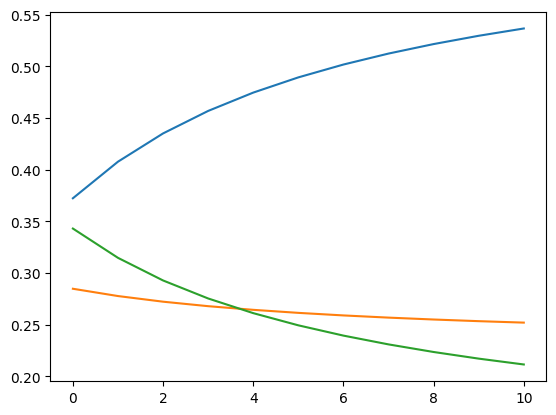

In [18]:
cdf_calc.sensitivityCellSupermatrixPlot(super,2,"3Alternatives",kitmodel)

0.0
Synthesized results: [0.4564 0.269  0.2746]
0.1
Synthesized results: [0.4607 0.2671 0.2722]
0.2
Synthesized results: [0.4643 0.2655 0.2702]
0.30000000000000004
Synthesized results: [0.4673 0.2642 0.2685]
0.4
Synthesized results: [0.4698 0.2631 0.267 ]
0.5
Synthesized results: [0.472  0.2622 0.2658]
0.6000000000000001
Synthesized results: [0.4738 0.2614 0.2648]
0.7000000000000001
Synthesized results: [0.4755 0.2607 0.2638]
0.8
Synthesized results: [0.4769 0.26   0.263 ]
0.9
Synthesized results: [0.4782 0.2595 0.2623]
1.0
Synthesized results: [0.4794 0.259  0.2617]


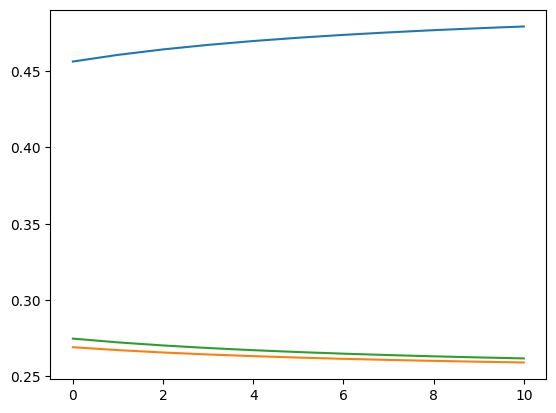

In [19]:
cdf_calc.sensitivityCellSupermatrixPlot(super,3,"3Alternatives",kitmodel)

0.0
Synthesized results: [0.4383 0.2585 0.3033]
0.1
Synthesized results: [0.4498 0.2629 0.2873]
0.2
Synthesized results: [0.459  0.2664 0.2746]
0.30000000000000004
Synthesized results: [0.4665 0.2692 0.2643]
0.4
Synthesized results: [0.4727 0.2716 0.2557]
0.5
Synthesized results: [0.4779 0.2735 0.2485]
0.6000000000000001
Synthesized results: [0.4824 0.2752 0.2423]
0.7000000000000001
Synthesized results: [0.4863 0.2767 0.237 ]
0.8
Synthesized results: [0.4897 0.278  0.2323]
0.9
Synthesized results: [0.4926 0.2791 0.2282]
1.0
Synthesized results: [0.4953 0.2801 0.2246]


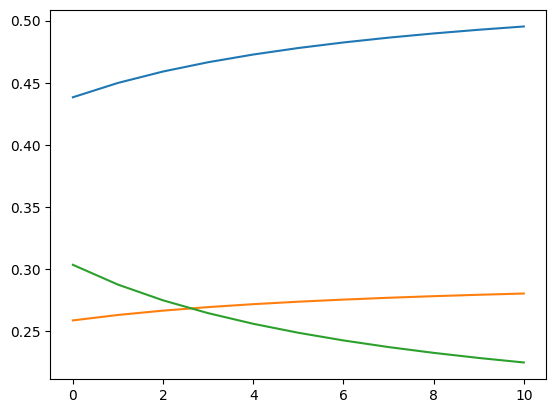

In [20]:
cdf_calc.sensitivityCellSupermatrixPlot(super,4,"3Alternatives",kitmodel)

0.0
Synthesized results: [0.5843 0.2419 0.1739]
0.1
Synthesized results: [0.5302 0.2529 0.2169]
0.2
Synthesized results: [0.4879 0.2615 0.2506]
0.30000000000000004
Synthesized results: [0.4538 0.2685 0.2777]
0.4
Synthesized results: [0.4258 0.2742 0.3   ]
0.5
Synthesized results: [0.4024 0.279  0.3186]
0.6000000000000001
Synthesized results: [0.3825 0.283  0.3345]
0.7000000000000001
Synthesized results: [0.3655 0.2865 0.3481]
0.8
Synthesized results: [0.3506 0.2895 0.3599]
0.9
Synthesized results: [0.3376 0.2922 0.3702]
1.0
Synthesized results: [0.3261 0.2945 0.3794]


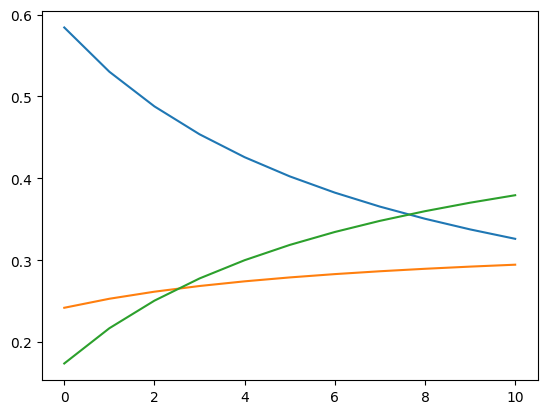

In [21]:
cdf_calc.sensitivityCellSupermatrixPlot(super,5,"3Alternatives",kitmodel)

0.0
Synthesized results: [0.4608 0.267  0.2721]
0.1
Synthesized results: [0.4865 0.2543 0.2592]
0.2
Synthesized results: [0.5099 0.2428 0.2474]
0.30000000000000004
Synthesized results: [0.5312 0.2322 0.2366]
0.4
Synthesized results: [0.5507 0.2225 0.2268]
0.5
Synthesized results: [0.5687 0.2136 0.2177]
0.6000000000000001
Synthesized results: [0.5853 0.2054 0.2093]
0.7000000000000001
Synthesized results: [0.6006 0.1978 0.2016]
0.8
Synthesized results: [0.6149 0.1907 0.1944]
0.9
Synthesized results: [0.6282 0.1842 0.1877]
1.0
Synthesized results: [0.6406 0.178  0.1814]


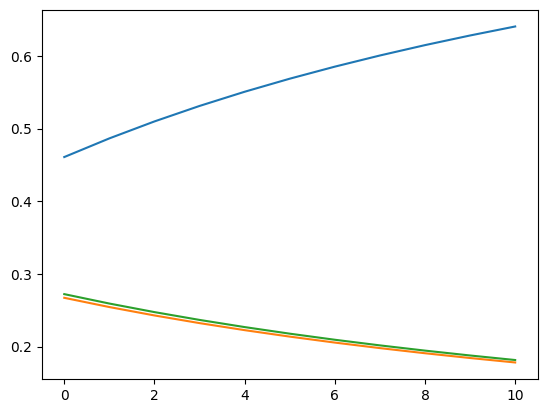

In [22]:
cdf_calc.sensitivityCellSupermatrixPlot(super,6,"3Alternatives",kitmodel)